In [1]:
import torch 
import h5py
import os 

import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

from plot_utils     import plot_ref_data, plot_ref_data_reco, plot_loss_history, plot_one_t, plot_two_t, plot_quantiles_evolution
from analysis_utils import compute_df, produce_bins, save_binning, load_binning, find_results, load_results, compute_t_from_loss
from nn_utils       import NPLMnetwork

In [2]:
hep.style.use(hep.style.CMS)
mpl.rcParams["figure.dpi"] = 60

In [3]:
OUTPUT_DIRECTORY = "./output/"

# Plotting parameters
FONTSIZE  = 36
FIGSIZE_R = (14, 12)
FIGSIZE   = (14, 10)
PALETTE_1 = [
    "#1f77b4", # 0
    "#4876bf", # 1 
    "#6c74c5", # 2
    "#8f6fc6", # 3
    "#b067c0", # 4
    "#cd5fb4", # 5
    "#e657a3", # 6
    "#f9528d", # 7
    "#ff5474", # 8
    "#ff5d58", # 9
    "#ff6c3a", # 10
    "#ff7f0e", # 11
]
PALETTE_2 = [
    "#494B69", # 0
    "#695D7A", # 1
    "#9F5B72", # 2
    "#D8707C", # 3
    "#FDA85A", # 4
    "#FDCD5A", # 5
]
PALETTE_3 = [
    "midnightblue",   # 0
    "#1f78b4",        # 1
    "lightseagreen",  # 2
    "mediumseagreen", # 3
    "darkseagreen",   # 4
]

PLOT_PATH = "./plots/"
if not os.path.exists(PLOT_PATH):
    os.makedirs(PLOT_PATH)

In [4]:
config_json_data = {
    "N_Ref": 200000,
    "N_Bkg": 2000,
    "N_Sig": 10,
    "SIG_LOC": 6.4,
    "SIG_STD": 0.16,
    "output_directory": "./output/1D/NRef_200000_NBkg_2000_NSig_10_SigLoc_6.4_SigStd_0.16_Epochs_200000_Patience_5000_WClip_9_Arch_1_4_1/2023_11_13_18_20_40_664973/",
    "input_directory": "./",
    "epochs": 200000,
    "patience": 5000,
    "architecture": [
        1,
        4,
        1
    ],
    "weight_clipping": 9,
    "date": "2023_11_13_18_20_40_664973",
    "pyscript": "toy.py"
}

config_json_ref  = {
    "N_Ref": 200000,
    "N_Bkg": 2000,
    "N_Sig": 0,
    "SIG_LOC": 6.4,
    "SIG_STD": 0.16,
    "output_directory": "./output/1D/NRef_200000_NBkg_2000_NSig_0_SigLoc_6.4_SigStd_0.16_Epochs_200000_Patience_5000_WClip_9_Arch_1_4_1/2023_11_13_22_47_46_885226/",
    "input_directory": "./",
    "epochs": 200000,
    "patience": 5000,
    "architecture": [
        1,
        4,
        1
    ],
    "weight_clipping": 9,
    "date": "2023_11_13_22_47_46_885226",
    "pyscript": "toy.py"
}

In [5]:
ref_dir  = config_json_ref["output_directory"]
data_dir = config_json_data["output_directory"]

In [6]:
ref_losses_names   = find_results(ref_dir, "losses.pth")
ref_weights_names  = find_results(ref_dir, "weights.pth")
data_losses_names  = find_results(data_dir, "losses.pth")
data_weights_names = find_results(data_dir, "weights.pth")

In [7]:
ref_losses, ref_weights   = load_results(ref_dir, ref_losses_names, ref_weights_names)
data_losses, data_weights = load_results(data_dir, data_losses_names, data_weights_names)

In [8]:
t_ref  = compute_t_from_loss(ref_losses)
t_data = compute_t_from_loss(data_losses)

In [9]:
t_ref_final  = t_ref[:, -1]
t_data_final = t_data[:, -1]

In [10]:
ref_dof  = compute_df(config_json_ref["architecture"])
ref_chi2 = stats.chi2(df=ref_dof)

In [11]:
t_ref_bins  = np.arange(0, 50, 5)
t_data_bins = np.arange(0, 80, 5)
xgrid_ref   = np.arange(0, 50, 0.5)
xgrid_data  = np.arange(0, 80, 0.5)

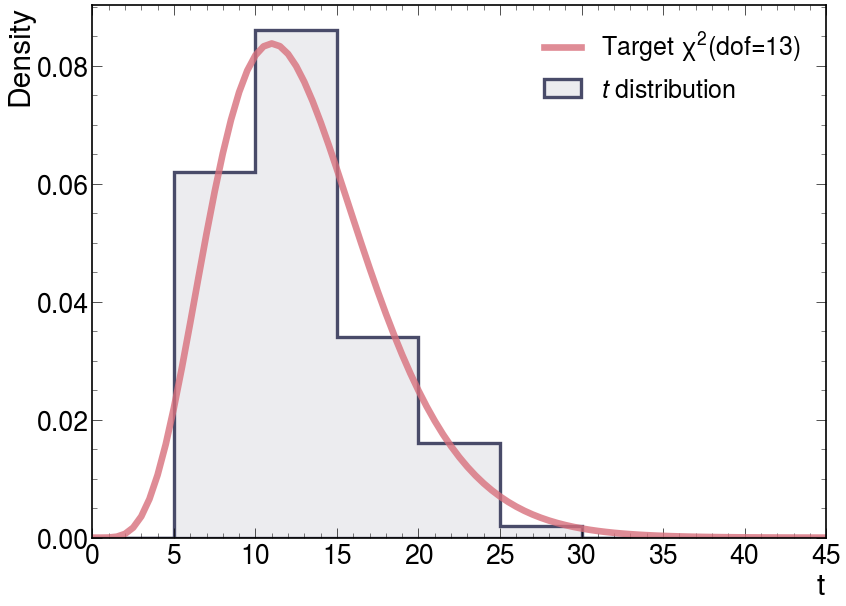

In [12]:
plot_one_t(
    t_distribution  = t_ref_final,
    t_bins          = t_ref_bins,
    chi2            = ref_chi2,
    chi2_grid       = xgrid_ref,
    show_hist       = True,
    show_error      = False,
    compute_rate    = False,
    err_marker      = "o",
    err_markersize  = 10,
    err_capsize     = 5,
    err_elinewidth  = 4,
    err_capthick    = 4,
    err_color       = "black",
    figsize         = FIGSIZE,
    fontsize        = FONTSIZE,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    hist_ecolor     = (PALETTE_2[0], 1.0),
    hist_fcolor     = (PALETTE_2[0], 0.1),
    chi2_color      = (PALETTE_2[3], 0.8),
    hist_lw         = 4,
    chi2_lw         = 8,
    hist_type       = "stepfilled",
    hist_label      = "$\it{t}$ distribution",
    chi2_label      = "Target $\chi^2$(dof=%i)"%(ref_dof),
    xlabel          = r"$t$",
    ylabel          = "Density",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "t_distribution",
    plot_path       = PLOT_PATH,
    plot_format     = "png",
    return_fig      = False
)

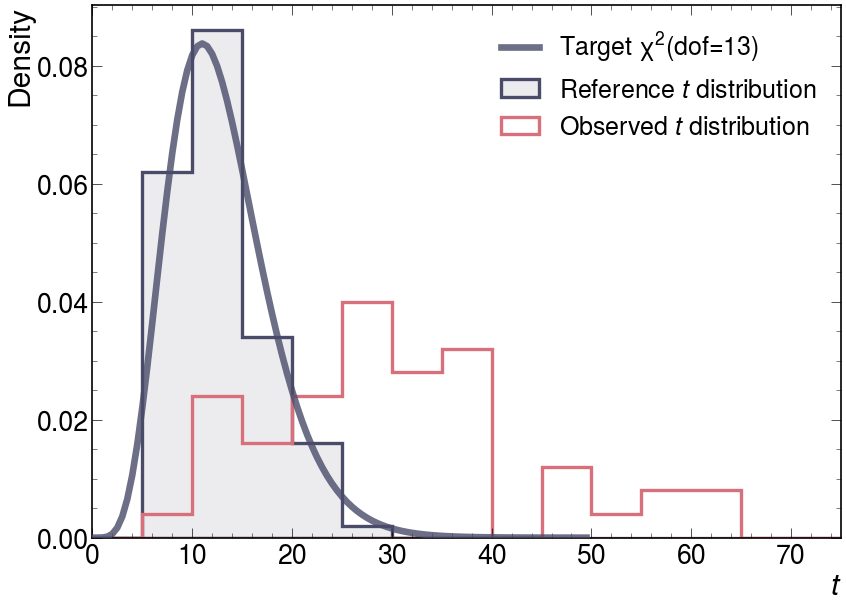

In [13]:
plot_two_t(
    t_distribution_1  = t_ref_final,
    t_bins_1          = t_ref_bins,
    t_distribution_2  = t_data_final,
    t_bins_2          = t_data_bins,
    chi2              = ref_chi2,
    chi2_grid         = xgrid_ref,
    show_error_1      = False,
    show_error_2      = False,
    show_hist_1       = True,
    show_hist_2       = True,
    compute_rate_1    = False,
    compute_rate_2    = True,
    err_marker_1      = "o",
    err_marker_2      = "o",
    err_markersize_1  = 10,
    err_markersize_2  = 10,
    err_capsize_1     = 5,
    err_capsize_2     = 5,
    err_elinewidth_1  = 4,
    err_elinewidth_2  = 4,
    err_capthick_1    = 4,
    err_capthick_2    = 4,
    figsize           = FIGSIZE,
    fontsize          = FONTSIZE,
    cms               = False,
    cms_label         = "",
    cms_rlabel        = "",
    hist_ecolor_1     = (PALETTE_2[0], 1),
    hist_ecolor_2     = (PALETTE_2[3], 1),
    hist_fcolor_1     = (PALETTE_2[0], 0.1),
    hist_fcolor_2     = (PALETTE_2[3], 0),
    err_ecolor_1      = (PALETTE_2[0], 1),
    err_ecolor_2      = (PALETTE_2[3], 1),
    chi2_color        = (PALETTE_2[0], 0.8),
    hist_lw_1         = 4,
    hist_lw_2         = 4,
    chi2_lw           = 8,
    hist_type_1       = "stepfilled",
    hist_type_2       = "stepfilled",
    hist_label_1      = "Reference $\it{t}$ distribution",
    hist_label_2      = "Observed $\it{t}$ distribution",
    chi2_label        = "Target $\chi^2$(dof=%i)"%(ref_dof),
    xlabel            = "$\it{t}$",
    ylabel            = "Density",
    show_plot         = True,
    save_plot         = False,
    plot_name         = "t_distribution",
    plot_path         = PLOT_PATH,
    plot_format       = "png",
    return_fig        = False
)

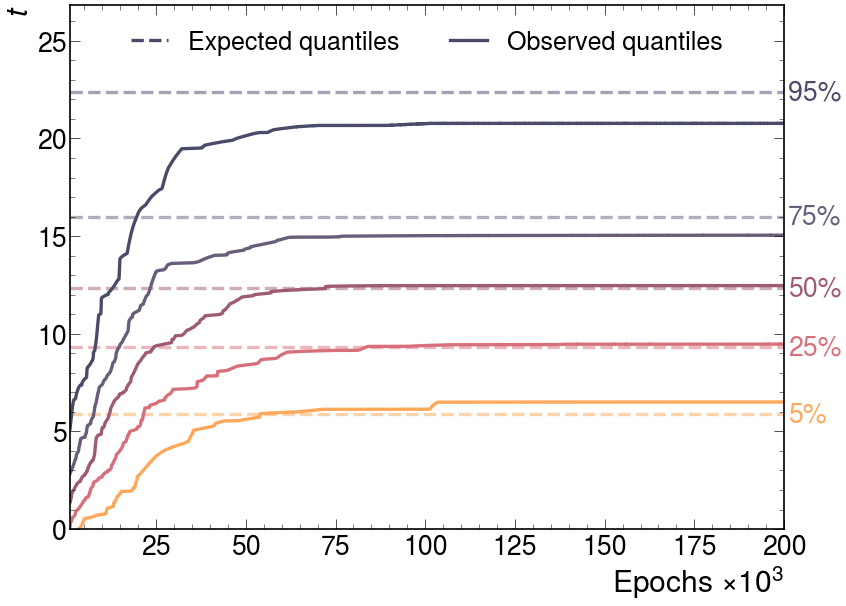

In [16]:
quantile_list   = [0.95,  0.75,  0.5,   0.25,  0.05]
quantile_labels = ["95%", "75%", "50%", "25%", "5%"]

plot_quantiles_evolution(
    t_history       = t_ref,
    quantile_list   = quantile_list,
    quantile_labels = quantile_labels,
    chi2            = ref_chi2,
    obs_alpha       = 1.0,
    th_alpha        = 0.5,
    epochs_init     = 1000,
    epochs_norm     = 1e3,
    figsize         = FIGSIZE,
    fontsize        = FONTSIZE,
    palette         = PALETTE_2,
    lw              = 4,
    cms             = False,
    cms_label       = "",
    cms_rlabel      = "",
    grid            = False,
    xlabel          = r"Epochs $\times 10^3$",
    ylabel          = "$\it{t}$",
    show_plot       = True,
    save_plot       = False,
    plot_name       = "loss_history",
    plot_path       = PLOT_PATH,
    plot_format     = "png",
    return_fig      = False
)